# <center>Outlier Detection and Removal Using the Z-Score Method</center>

#### Z-Score Formula

The Z-score, also known as the standard score, measures how many standard deviations a data point is from the mean of the dataset. The formula for calculating the Z-score is:

\[
Z = \frac{X - \mu}{\sigma}
\]

Where:
- \( Z \) = Z-score
- \( X \) = Value of the data point
- \( \mu \) = Mean of the dataset
- \( \sigma \) = Standard deviation of the dataset

#### Condition for Z-Score Outliers

Typically, a data point is considered an outlier if its Z-score satisfies one of the following conditions:

- **Z > 3**: The data point is more than 3 standard deviations above the mean.
- **Z < -3**: The data point is more than 3 standard deviations below the mean.

These thresholds (3 and -3) are commonly used, but the exact threshold can be adjusted depending on the specific context or dataset. For example, in a very strict analysis, a threshold of 2 or -2 might be used to detect more subtle outliers.

#### Steps for Outlier Detection and Removal Using the Z-Score Method

1. **Calculate the Mean** (\( \mu \)) of the dataset.
2. **Calculate the Standard Deviation** (\( \sigma \)) of the dataset.
3. **Compute the Z-Score** for each data point using the formula above.
4. **Identify Outliers**: Mark any data point with a Z-score greater than 3 or less than -3 as an outlier.
5. **Remove or Treat Outliers**: Depending on the analysis, remove the outliers or apply a treatment method, such as transformation or capping.

This method is straightforward and effective for detecting outliers in datasets that follow a normal distribution.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.shape

(1000, 3)

In [4]:
df.sample(5)

,cgpa,placement_exam_marks,placed
8,6.45,38.0,0
831,6.81,55.0,1
815,5.27,43.0,0
636,6.39,43.0,1
932,6.89,71.0,0


C:\Users\write\AppData\Local\Temp\ipykernel_10428\2567736704.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
C:\Users\write\AppData\Local\Temp\ipykernel_10428\2567736704.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


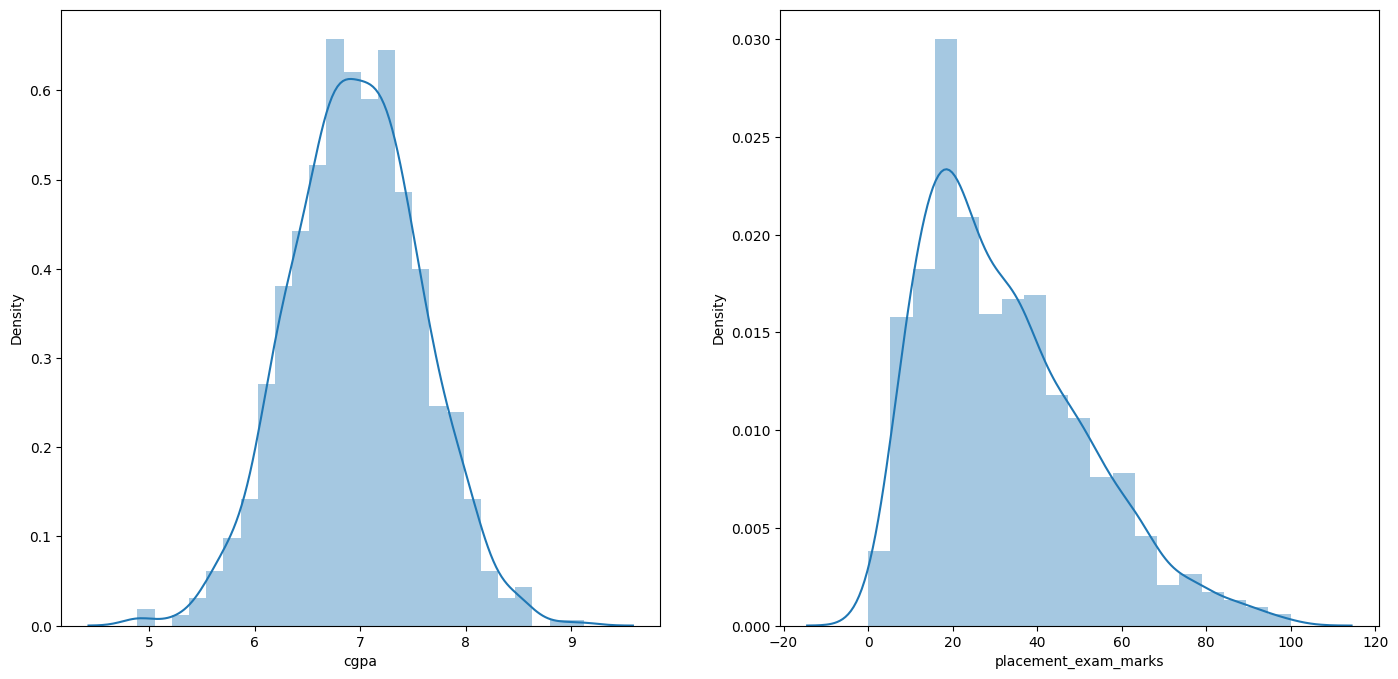

In [18]:
plt.figure(figsize=(17,8))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show() # here we observe that cgpa is distributed properly but placement_exam_marks is not, so we use Z-score on cgpa

In [20]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [21]:
df['cgpa'].skew()

-0.014529938929314918

In [22]:
print("Mean value of cgpa",df['cgpa'].mean())
print("Std value of cgpa",df['cgpa'].std())
print("Min value of cgpa",df['cgpa'].min())
print("Max value of cgpa",df['cgpa'].max())

Mean value of cgpa 6.96124
Std value of cgpa 0.6158978751323896
Min value of cgpa 4.89
Max value of cgpa 9.12


In [25]:
# finding the boundary values
print("Highest allowed", df['cgpa'].mean() + 3 * df['cgpa'].std())
print("Lowest allowed", df['cgpa'].mean() - 3 * df['cgpa'].std())
# values which passes this peak values are called to be a outliers

Highest allowed 8.808933625397168
Lowest allowed 5.113546374602832


In [29]:
# finding the outliers
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


## Trimming

In [32]:
new_df = df[(df['cgpa'] > 5.11) & (df['cgpa'] < 8.80)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


### Approach 2

In [35]:
# calculateing the Z-score
df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean()) / df['cgpa'].std()

In [36]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [42]:
df[df['cgpa_zscore'] > 3] # 3 is commonly used as the outliers boundaries for z-score (range from -3 to 3)

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [43]:
df[df['cgpa_zscore'] < -3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


### Trimming

In [45]:
new_df = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]

In [47]:
new_df # outliers are removed

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


# Capping

**Capping** is a data preprocessing technique used to limit the values in a dataset to a specified range. It involves setting upper and lower bounds (caps) on the values of a feature. Any value above the upper cap is replaced by the upper bound, and any value below the lower cap is replaced by the lower bound.

### Example:
- **Lower cap**: If you set a lower cap at 5, any value below 5 will be set to 5.
- **Upper cap**: If you set an upper cap at 90, any value above 90 will be set to 90.

### Purpose:
- **Handle outliers**: Capping helps in reducing the influence of outliers on the model by bringing extreme values closer to the rest of the data.
- **Improve model performance**: It ensures that the extreme values do not skew the model's predictions.



In [48]:
upper_limit = df['cgpa'].mean() + 3 * df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3 * df['cgpa'].std()

In [49]:
print(upper_limit)
print(lower_limit)

8.808933625397168
5.113546374602832


In [50]:
df['cgpa'] = np.where(
    df['cgpa'] > upper_limit,
    upper_limit,
    np.where(
        df['cgpa'] < lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [51]:
df.shape

(1000, 4)

In [55]:
df['cgpa'].describe()  # here we observe that minimum and maximum values are changed to upper and lower limit

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64